## IMDB데이터셋으로 LSTM학습시키기

- LSTM: SimpleRNN의 그래디언트 손실문제를 보완한 방법

- 정보를 여러 시점에 걸쳐 나르는 장치('Cell State')가 추가되었다.
- 이로 인해 그래디언트를 보존할 수 있어 그래디언트 손실 문제가 발생하지 않도록 도와준다.

## IMDB 데이터셋 사용하기

In [1]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


## 데이터를 동일한 길이로 맞추기

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

# 길이를 맞추기 위해 pad_sequences() 함수 사용
# 데이터가 지정해준 길이(max_len)보다 짧은 경우 0으로 채워넣으며 긴 경우는 잘라낸다.
pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)

## 학습을 위한 층 쌓기

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))     # 32개의 결과값

model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 390,305
Trainable params: 390,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist = model.fit(pad_x_train, y_train, batch_size = 32, epochs = 15, validation_split = 0.2)

# 학습 결과로 리턴된 history에서 확인할 수 있는 지표 출력
print(hist.history.keys())

Epoch 1/15
625/625 [==============================] - 408s 653ms/step - loss: 0.5091 - acc: 0.7473 - val_loss: 0.3986 - val_acc: 0.8214
Epoch 2/15
625/625 [==============================] - 391s 626ms/step - loss: 0.2903 - acc: 0.8832 - val_loss: 0.3173 - val_acc: 0.8670
Epoch 3/15
625/625 [==============================] - 390s 625ms/step - loss: 0.2164 - acc: 0.9210 - val_loss: 0.3224 - val_acc: 0.8600
Epoch 4/15
625/625 [==============================] - 390s 625ms/step - loss: 0.1606 - acc: 0.9428 - val_loss: 0.3329 - val_acc: 0.8742
Epoch 5/15
625/625 [==============================] - 392s 628ms/step - loss: 0.1345 - acc: 0.9535 - val_loss: 0.4346 - val_acc: 0.8562
Epoch 6/15
625/625 [==============================] - 393s 628ms/step - loss: 0.1292 - acc: 0.9538 - val_loss: 0.5505 - val_acc: 0.8520
Epoch 7/15
625/625 [==============================] - 393s 628ms/step - loss: 0.0821 - acc: 0.9736 - val_loss: 0.4508 - val_acc: 0.8578
Epoch 8/15
625/625 [============================

## 모델 평가하기

In [6]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 169s 216ms/step - loss: 0.6970 - acc: 0.8394


[0.6969785690307617, 0.8393999934196472]

## 학습과정 그리기

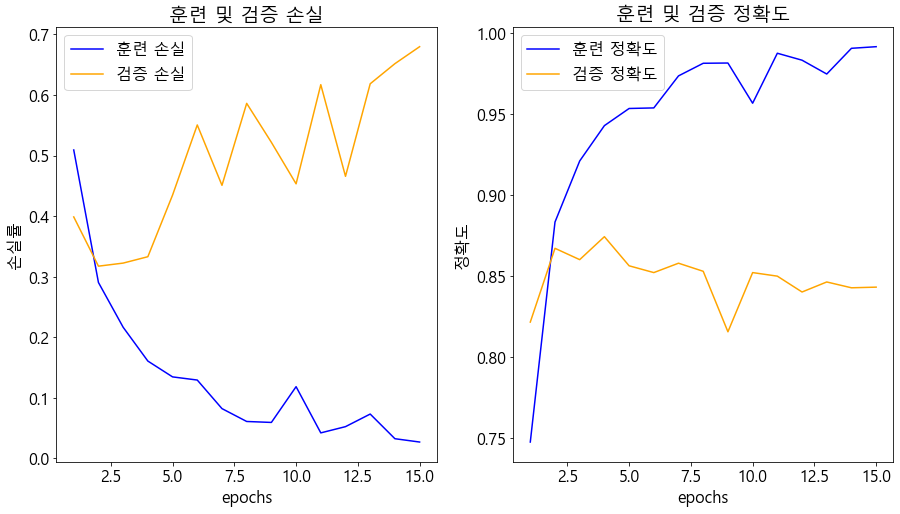

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (15, 8)

his_dict = hist.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure()

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = '훈련 손실')
ax1.plot(epochs, val_loss, color = 'orange', label = '검증 손실')
ax1.set_title('훈련 및 검증 손실')
ax1.set_xlabel('epochs')
ax1.set_ylabel('손실률')
ax1.legend()

# 훈련 및 검증 정확도 그리기
acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = '훈련 정확도')
ax2.plot(epochs, val_acc, color = 'orange', label = '검증 정확도')
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('epochs')
ax2.set_ylabel('정확도')
ax2.legend()

plt.show()